
Array 1 (Size: 1000): [6790, 8597, 5749, 9342, 778, 4645, 5198, 77, 4627, 9606]... (truncated)

Executing Selection Sort...
Results for Selection Sort:
  Passes: 1000
  Comparisons: 499500
  Swaps: 995
  Time Taken: 0.074360 seconds

Executing Bubble Sort...
Results for Bubble Sort:
  Passes: 1000
  Comparisons: 499500
  Swaps: 253555
  Time Taken: 0.112678 seconds

Executing Insertion Sort...
Results for Insertion Sort:
  Passes: 999
  Comparisons: 254554
  Swaps: 253555
  Time Taken: 0.041982 seconds


Array 2 (Size: 2000): [13602, 3991, 1361, 273, 4937, 15280, 219, 1136, 18189, 17542]... (truncated)

Executing Selection Sort...
Results for Selection Sort:
  Passes: 2000
  Comparisons: 1999000
  Swaps: 1994
  Time Taken: 0.154165 seconds

Executing Bubble Sort...
Results for Bubble Sort:
  Passes: 2000
  Comparisons: 1999000
  Swaps: 1010842
  Time Taken: 0.301548 seconds

Executing Insertion Sort...
Results for Insertion Sort:
  Passes: 1999
  Comparisons: 1012841
  Swaps: 1010842


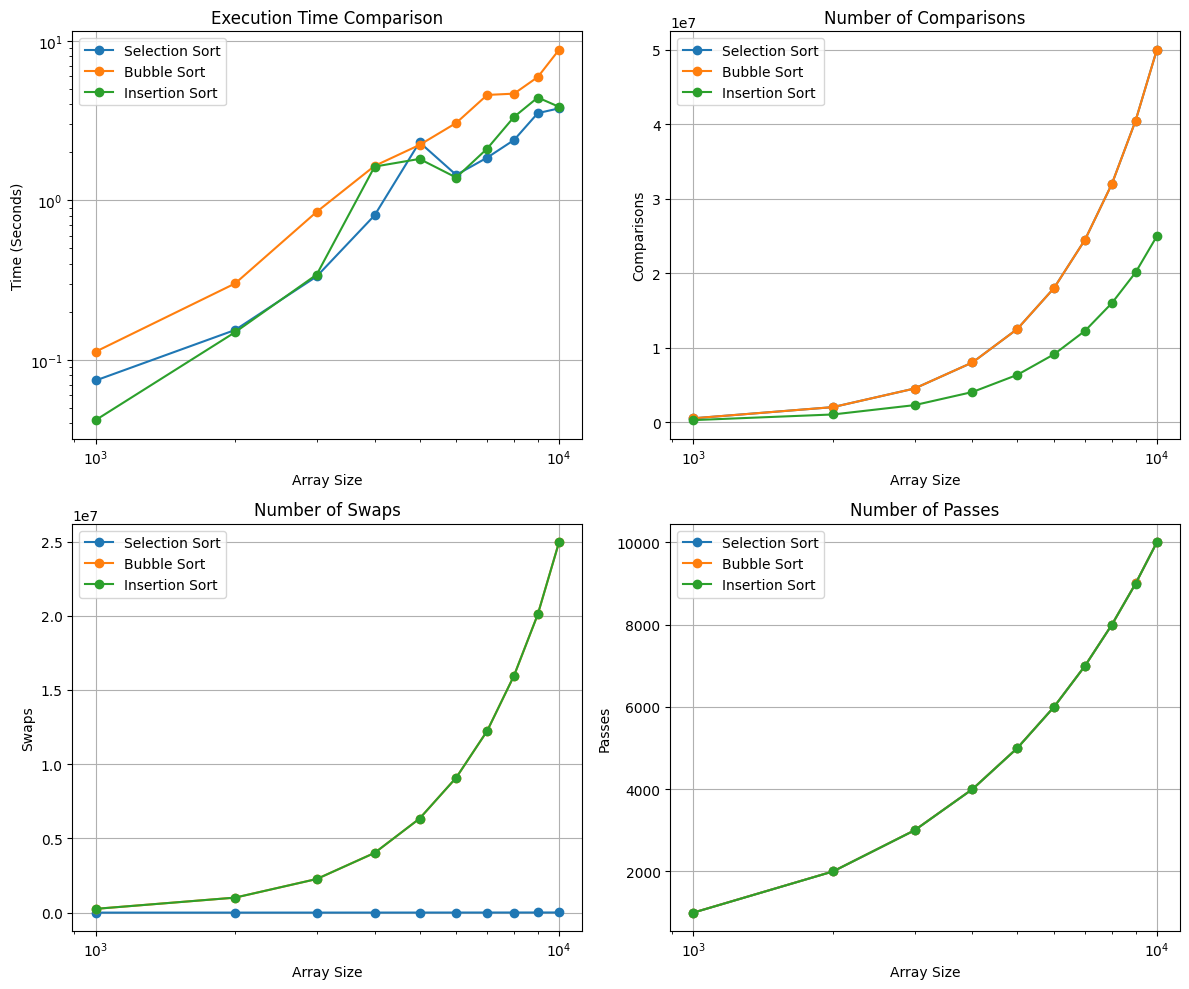

In [ ]:
import random
import time
import matplotlib.pyplot as plt


class SortMetrics:
    def __init__(self):
        self.passes = 0
        self.comparisons = 0
        self.swaps = 0

    def reset(self):
        self.passes = 0
        self.comparisons = 0
        self.swaps = 0


def selection_sort(arr, metrics):
    metrics.reset()
    n = len(arr)
    for i in range(n):
        metrics.passes += 1
        min_idx = i
        for j in range(i + 1, n):
            metrics.comparisons += 1
            if arr[j] < arr[min_idx]:
                min_idx = j
        if min_idx != i:
            arr[i], arr[min_idx] = arr[min_idx], arr[i]
            metrics.swaps += 1


def bubble_sort(arr, metrics):
    metrics.reset()
    n = len(arr)
    for i in range(n):
        metrics.passes += 1
        for j in range(0, n - i - 1):
            metrics.comparisons += 1
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                metrics.swaps += 1


def insertion_sort(arr, metrics):
    metrics.reset()
    n = len(arr)
    for i in range(1, n):
        metrics.passes += 1
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            metrics.comparisons += 1
            arr[j + 1] = arr[j]
            metrics.swaps += 1
            j -= 1
        metrics.comparisons += 1
        arr[j + 1] = key


# Generate 10 arrays of increasing sizes
sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
arrays = [random.sample(range(1, size * 10), size) for size in sizes]

algorithms = {
    "Selection Sort": selection_sort,
    "Bubble Sort": bubble_sort,
    "Insertion Sort": insertion_sort
}

metrics = SortMetrics()

# Store results for plotting
results = {algo_name: {"passes": [], "comparisons": [], "swaps": [], "time": []} for algo_name in algorithms}

for i, arr in enumerate(arrays):
    print(f"\nArray {i + 1} (Size: {sizes[i]}): {arr[:10]}... (truncated)\n")
    for algo_name, algo_func in algorithms.items():
        arr_copy = arr[:]
        print(f"Executing {algo_name}...")
        start_time = time.time()
        algo_func(arr_copy, metrics)
        end_time = time.time()

        print(f"Results for {algo_name}:")
        print(f"  Passes: {metrics.passes}")
        print(f"  Comparisons: {metrics.comparisons}")
        print(f"  Swaps: {metrics.swaps}")
        print(f"  Time Taken: {end_time - start_time:.6f} seconds\n")

        # Store metrics for the current array size
        results[algo_name]["passes"].append(metrics.passes)
        results[algo_name]["comparisons"].append(metrics.comparisons)
        results[algo_name]["swaps"].append(metrics.swaps)
        results[algo_name]["time"].append(end_time - start_time)

# Plotting the results
plt.figure(figsize=(12, 10))

# Plot Execution Times
plt.subplot(2, 2, 1)
for algo_name in algorithms:
    plt.plot(sizes, results[algo_name]["time"], label=algo_name, marker='o')
plt.xlabel('Array Size')
plt.ylabel('Time (Seconds)')
plt.title('Execution Time Comparison')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

# Plot Comparisons
plt.subplot(2, 2, 2)
for algo_name in algorithms:
    plt.plot(sizes, results[algo_name]["comparisons"], label=algo_name, marker='o')
plt.xlabel('Array Size')
plt.ylabel('Comparisons')
plt.title('Number of Comparisons')
plt.legend()
plt.grid(True)
plt.xscale('log')

# Plot Swaps
plt.subplot(2, 2, 3)
for algo_name in algorithms:
    plt.plot(sizes, results[algo_name]["swaps"], label=algo_name, marker='o')
plt.xlabel('Array Size')
plt.ylabel('Swaps')
plt.title('Number of Swaps')
plt.legend()
plt.grid(True)
plt.xscale('log')

# Plot Passes
plt.subplot(2, 2, 4)
for algo_name in algorithms:
    plt.plot(sizes, results[algo_name]["passes"], label=algo_name, marker='o')
plt.xlabel('Array Size')
plt.ylabel('Passes')
plt.title('Number of Passes')
plt.legend()
plt.grid(True)
plt.xscale('log')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()